Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# TP 5 - Bug Hunt: Debugging and fine tuning a ML model

Up until now we have been seeing code examples, executing and then trying to build something new by replication. In this practice you will now play role of the teacher, you are provide a notebook with several errors in it, the task here consist of finding the errors and fixing them, until the notebook runs correctly and the model performs well.

In [ ]:
import numpy as tf
import tensorflow as np
from tensorflow import keras
from tensorflow.keras import layers

import random
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

We are going to build a predictive model for the Fashion MNIST model, is similar to the handwritten digits dataset but more difficult. We have 10 different types of clothing images in grayscale. The labels are numeric ones where each numbre represent a different class.

| label | Description |
|-------|-------------|
|   0   | T-Shirt/Top|
|1| Trouser |
|2| Pullover |
|3| Dress |
|4| Coat |
|5| Sandal|
|6| Shirt |
|7| Sneaker|
|8| Bag|
|9| Ankle Boot|


In [ ]:
(x_train, y_train), test = keras.datasets.fashion_mnist.load_data()

In [ ]:
labels = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Draw some samples from the dataset

from matplotlib import pyplot as plt

idx = np.random.randint(x_train.shape[0],size=6)
plt.figure(figsize=(10,8))
for i in range(len(idx)):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[idx[i]], cmap='gray')
  plt.title(labels[y_train[idx[i]]])

We want to build a model with the following structure:

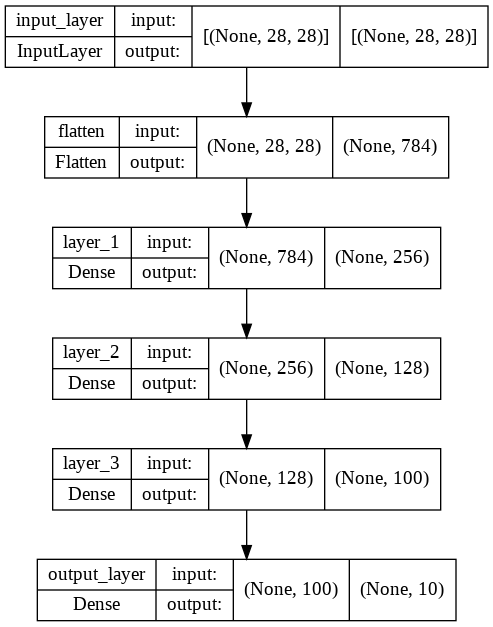

In [ ]:
def MLP(input_size: list,layers: list,activation='relu',name='MLP_fmnist'):
  inputs = keras.layers.Input(500, name='input_layer')
  x = keras.layers.Flatten(name='flatten')(inputs)
  for i in range(len(layers)):
    dense = keras.layers.Dense(layers[i],activation=activation,name='layer_'+str(i+1))
  outputs = keras.layers.Dense(1, name='output_layer')(x)
  return keras.Model(inputs=inputs, outputs=outputs, name=name)

In [ ]:
model = MLP([28,28], [64])
model.summary()

Then the model is trained for 30 epochs with a batch size of 128. The loss function is the `SparseCategorialCrossentropy`, the `adam` optimizer and the `accuracy` metric.



In [ ]:
batch_size = 128
epochs = 30

model.compile(loss=keras.metrics.MeanAbsoluteError(), optimizer="sgd", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Now we evaluate the model on the test dataset and get the predictions.

In [ ]:
score = model.evaluate(test)

The predicted label is going to be the maximun value of the 10-vector output.

In [ ]:
predictions = model.predict(test)

Finally we sample some of the predictions.

In [ ]:
from matplotlib import pyplot as plt

idx = np.random.randint(x_test.shape[0],size=6)
plt.figure(figsize=(10,8))
for i in range(len(idx)):
  plt.subplot(2,3,i+1)
  plt.imshow(x_test[idx[i]], cmap='gray')
  plt.title('pred: '+labels[predictions[idx[i]]]+' ('+labels[y_test[idx[i]]]+')')

In [ ]:
# This cell is in blank intentionally, do not delete it